In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('./data/train.csv')

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df = train_df.drop(['PassengerId', 'Name','Ticket', 'Fare' ], axis = 1)

In [7]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#성별로 나눠보기
men = train_df[train_df['Sex']=='male'].copy()
women = train_df[train_df['Sex'] == 'female'].copy()

In [18]:
x = men.iloc[:,0] # men -생존
x = men.iloc[:,1:] # men - 생존 제외

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


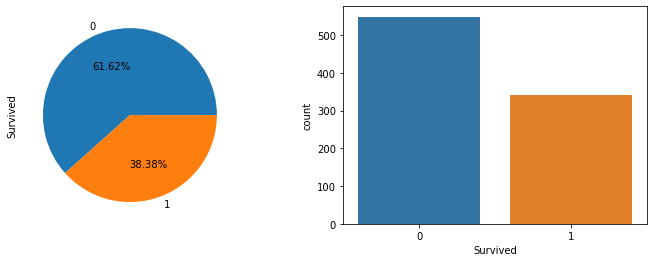

In [19]:
# 생존 비율 알아보기
f, ax = plt.subplots(1,2, figsize  =(12,4)) # 2개 만들기
train_df['Survived'].value_counts().plot.pie(autopct='%1.2f%%', ax = ax[0])
sns.countplot('Survived', data = train_df, ax= ax[1])
plt.show()

In [20]:
# 성별 , 생존 으로 그룹을 나눠서 각각의 수 파악

train_df.groupby(['Sex','Survived'])['Survived'].count() # 숫자 파악
train_df.groupby(['Sex'])['Survived'].mean() # 비율 파악
# 여자 생존/사망 : 233 / 81
# 남자 생손/사망 : 109 / 468

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


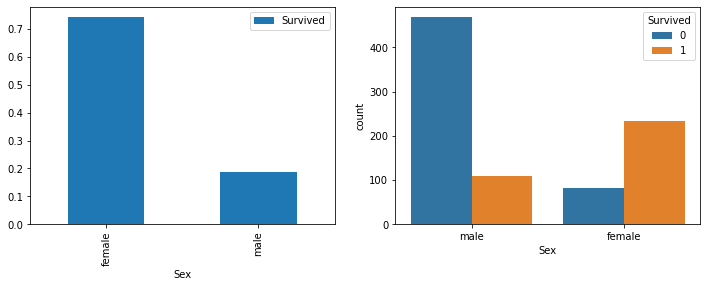

In [21]:
# 성별 생존 비율 , 각 성별로 생존/사망 그래프 
f, ax = plt.subplots(1, 2, figsize = (12,4))
train_df[['Survived', 'Sex']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
sns.countplot('Sex', hue = 'Survived', data=train_df, ax= ax[1])
plt.show()

In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [23]:
# 클래스별 생존률 확인
train_df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [24]:
# 클래스 > 성별 > 생존 여부 나눠서 보기
train_df.groupby(['Pclass','Sex','Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


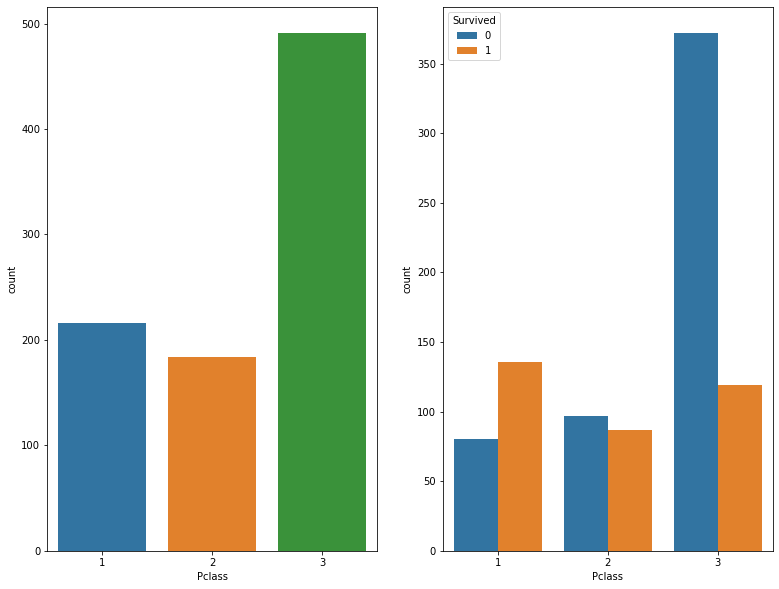

In [25]:
# Pclass 각 숫자 표시 / Pclass 별 생존자 수 표시
f, ax = plt.subplots(1, 2 , figsize=(13,10))
sns.countplot(x='Pclass', data = train_df, ax=ax[0])
sns.countplot('Pclass', hue ='Survived', data = train_df, ax=ax[1])
plt.show()
# 인원 : 3등급 > 1등급 > 2등급 순 
# 사망인원 : 3등급 > 2등급 > 1등급 순
# 생존인원 : 1등급 > 3등급 > 2등급 순
# 비율로 따지면 3등급이 월등하게 사망률 이 높음

In [26]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
# Age null 갯수 확인
train_df['Age'].isnull().sum()

177

In [28]:
# 평균으로 null 값 채우기
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [29]:
train_df['Age'].isnull().sum()

0

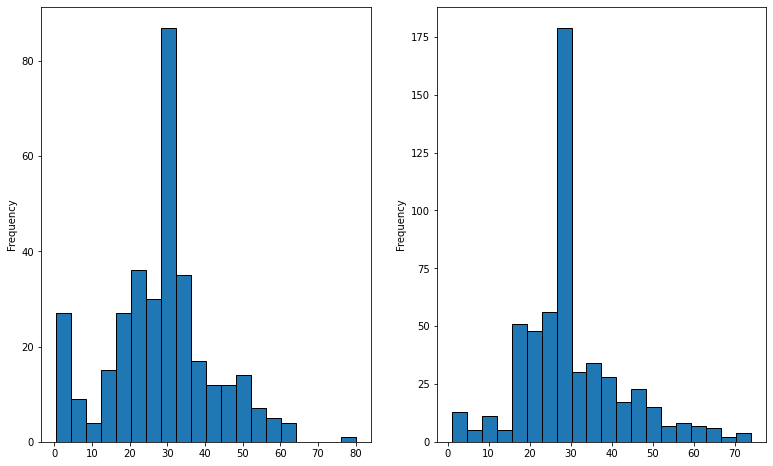

In [30]:
# 연령별 생존/사망 비율 확인 
f, ax = plt.subplots(1, 2 , figsize =(13,8))
train_df[train_df['Survived']==1]['Age'].plot.hist(bins=20,edgecolor='black',ax=ax[0])
train_df[train_df['Survived']==0]['Age'].plot.hist(bins=20,edgecolor='black', ax=ax[1])
plt.show()


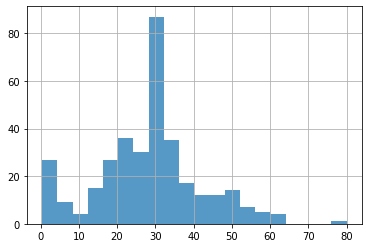

In [31]:
plt.hist(train_df[train_df['Survived']==1]['Age'], bins=20,alpha=0.75)
plt.grid(True)

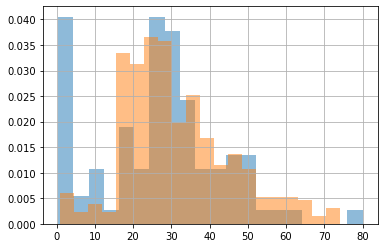

In [32]:
# 남성의 연령별 생존/사망 비율 
plt.plot()
plt.hist(men[men['Survived']==1].Age, bins=20, alpha=0.5, density=True)
plt.hist(men[men['Survived']==0].Age, bins=20, alpha=0.5,density=True)
plt.grid(True)
plt.show()

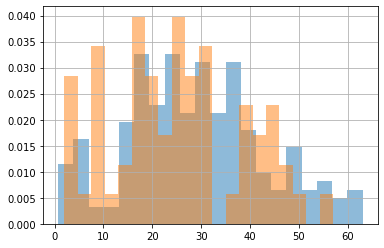

In [36]:
# 여성의 연령별 생존/사망 비율
plt.plot()
plt.hist(women[women['Survived']==1].Age, bins=20, alpha=0.5, density=True)
plt.hist(women[women['Survived']==0].Age, bins=20, alpha=0.5,density=True)
plt.grid(True)
plt.show()

In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [41]:
# 승선한 곳 null 값 확인 # 2개의 null 값 확인 
train_df['Embarked'].isnull().sum()

2

In [68]:
# null 값을 제일많은 S 로 잡아줌 
train_df['Embarked'].fillna('S', inplace =True)

In [69]:
# null값 재확인
train_df['Embarked'].isnull().sum()

0

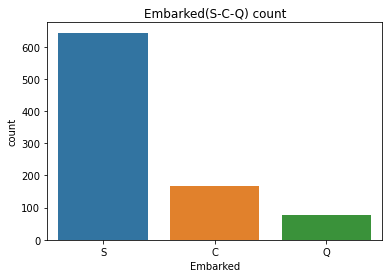

In [67]:
# 승선한 곳 인원 수 : S > C > Q 순

sns.countplot(x='Embarked', data = train_df)
plt.title('Embarked(S-C-Q) count')
plt.show()

Text(0.5, 1.0, 'Cabin - Survived')

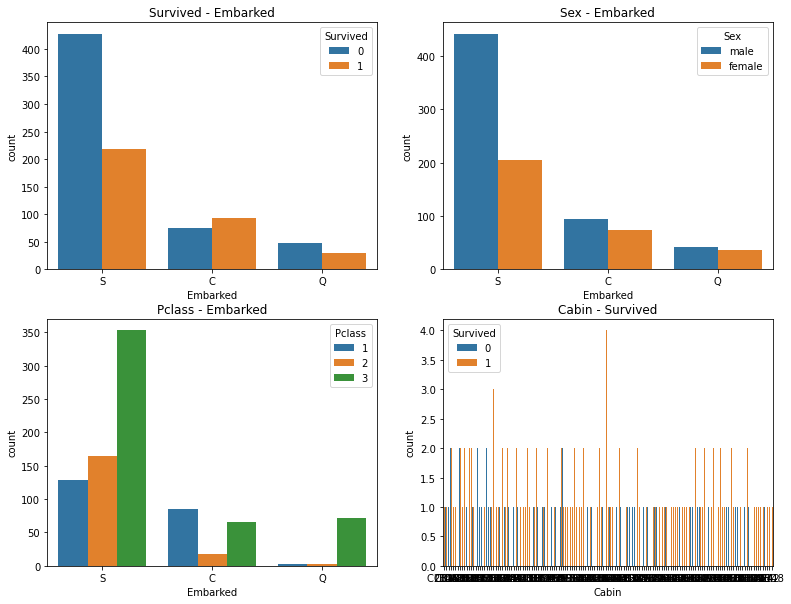

In [78]:
f, ax = plt.subplots(2,2, figsize=(13,10))
# 승선한곳에따른 생존/사망 수 
sns.countplot(x = 'Embarked', hue = 'Survived',data = train_df, ax=ax[0,0]) 
ax[0,0].set_title('Survived - Embarked')
# 승선한곳에따른 성별 
sns.countplot(x = 'Embarked', hue = 'Sex', data = train_df , ax = ax[0,1])
ax[0,1].set_title('Sex - Embarked')
# 승선한 곳에 따른 Pclass 별 수
sns.countplot(x = 'Embarked', hue = 'Pclass', data=train_df, ax = ax[1,0])
ax[1,0].set_title('Pclass - Embarked')
sns.countplot(x = 'Cabin', hue = 'Survived', data=train_df, ax = ax[1,1])
ax[1,1].set_title('Cabin - Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

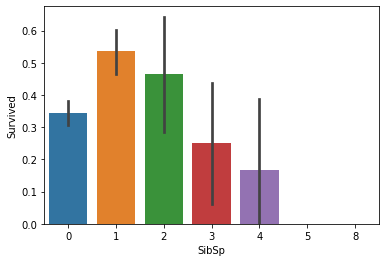

In [71]:
# 가족 숫자 당 생존
sns.barplot(x='SibSp',y='Survived',data=train_df)

In [72]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.000000,1,0,NaN,S
1,1,1,female,38.000000,1,0,C85,C
2,1,3,female,26.000000,0,0,NaN,S
3,1,1,female,35.000000,1,0,C123,S
4,0,3,male,35.000000,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,NaN,S
887,1,1,female,19.000000,0,0,B42,S
888,0,3,female,29.699118,1,2,NaN,S
889,1,1,male,26.000000,0,0,C148,C


In [73]:
train_df['Sex'].replace({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

참고사이트
https://jfun.tistory.com/137?category=828812
https://www.kangtaeho.com/89